In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics  
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

In [2]:
train_data = pd.read_csv('train_data.csv')
y_train = train_data['Grade'] # series not df
X_train = train_data.drop(columns=['Grade'])

test_data = pd.read_csv('test_data.csv')
y_test = test_data['Grade']
X_test = test_data.drop(columns=['Grade'])

X_train.info()
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pH           847 non-null    float64
 1   Temperature  847 non-null    float64
 2   Colour       847 non-null    float64
 3   Taste        847 non-null    int64  
 4   Odor         847 non-null    int64  
 5   Fat          847 non-null    int64  
 6   Turbidity    847 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 46.4 KB
<class 'pandas.core.series.Series'>
RangeIndex: 847 entries, 0 to 846
Series name: Grade
Non-Null Count  Dtype
--------------  -----
847 non-null    int64
dtypes: int64(1)
memory usage: 6.7 KB


<Axes: >

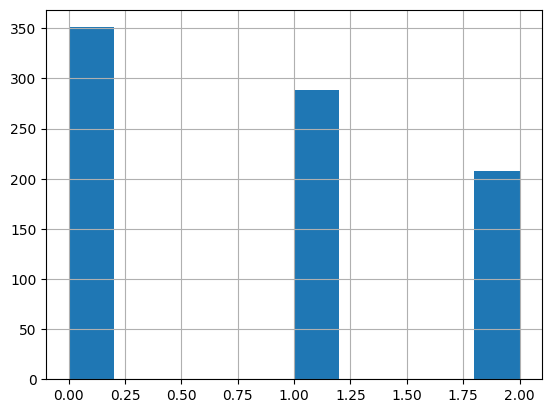

In [17]:
y_train.hist() # checking class balance

https://scikit-learn.org/1.6/modules/generated/sklearn.ensemble.RandomForestClassifier.html
https://www.geeksforgeeks.org/random-forest-classifier-using-scikit-learn/

Random forest classifier parameters:
- `n_estimators` (B): number of trees in the forest
    - default = 100
    - generally more is better but time-consuming
- `max_depth`: maximum depth of each tree
    - default = None
    - deeper trees can capture more complex patterns, but also risk overfitting
    - experiment with values between 5 and 15, and consider lower values for smaller datasets
- `max_features` (m): number of features considered for splitting at each node
    - default = 'sqrt' (square root of total number of features p)
    - adjust based on dataset size and feature importance
- `criterion`: function used to measure split quality ('gini' or 'entropy')
    - gini is often slightly faster, but both are similar in performance
- `min_samples_split`: minimum samples requires to split a node
    - default = 2
    - higher values can prevent overfitting, too high can hinder model complexity
- `min_samples_leaf`: minimum samples required to be at a leaf node (prediction)
    - default = 1
- `bootstrap`: whether to use bootstrap sampling when building trees (True or False)
    - default = True

In [3]:
# default RF classifier
clf = RandomForestClassifier(random_state=42)

# get cross-validated predictions and performance report
y_val_pred = cross_val_predict(clf, X_train, y_train, cv=5)
cv_report = classification_report(y_train, y_val_pred)
print('Cross-validation classification report')
print(cv_report)

# train the model on the entire training set
clf.fit(X_train, y_train)

# get test predictions and performance report
y_test_pred = clf.predict(X_test)
test_report = classification_report(y_test, y_test_pred)
print('Test classification report')
print(test_report)

Cross-validation classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       351
           1       1.00      1.00      1.00       288
           2       1.00      1.00      1.00       208

    accuracy                           1.00       847
   macro avg       1.00      1.00      1.00       847
weighted avg       1.00      1.00      1.00       847

Test classification report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        78
           1       1.00      1.00      1.00        86
           2       0.98      1.00      0.99        48

    accuracy                           1.00       212
   macro avg       0.99      1.00      0.99       212
weighted avg       1.00      1.00      1.00       212



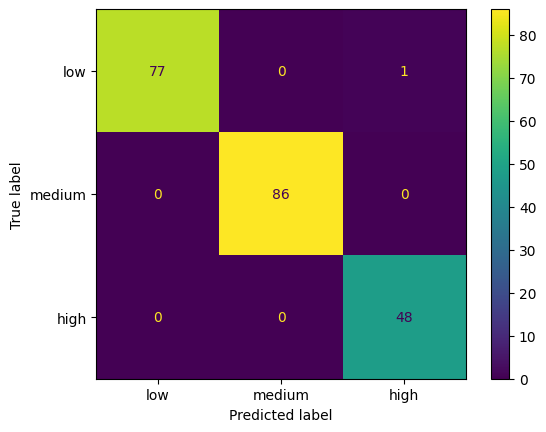

In [20]:
labels = ['low', 'medium', 'high']
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.show()

In [25]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [10, 25, 50, 75, 100], # [50, 75, 100, 125, 150],  # Number of trees
    'max_depth': [None, 5, 10, 15, 20]  # Maximum depth of each tree
}

# Initialize the RandomForest classifier
clf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    cv=5,
    scoring='f1_macro',  # You can change this based on your evaluation metric
    n_jobs=-1,  # Use all available processors
    verbose=1  # To see progress
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
print("Best parameters:", grid_search.best_params_)

# Use the best estimator from grid search
best_clf = grid_search.best_estimator_

# Get cross-validated predictions and performance report
y_val_pred = cross_val_predict(best_clf, X_train, y_train, cv=5)
cv_report = classification_report(y_train, y_val_pred)
print('Cross-validation classification report')
print(cv_report)

# Train the best model on the entire training set
best_clf.fit(X_train, y_train)

# Get test predictions and performance report
y_test_pred = best_clf.predict(X_test)
test_report = classification_report(y_test, y_test_pred)
print('Test classification report')
print(test_report)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best parameters: {'max_depth': None, 'n_estimators': 10}
Cross-validation classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       351
           1       1.00      1.00      1.00       288
           2       1.00      1.00      1.00       208

    accuracy                           1.00       847
   macro avg       1.00      1.00      1.00       847
weighted avg       1.00      1.00      1.00       847

Test classification report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        78
           1       0.99      1.00      0.99        86
           2       1.00      1.00      1.00        48

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212



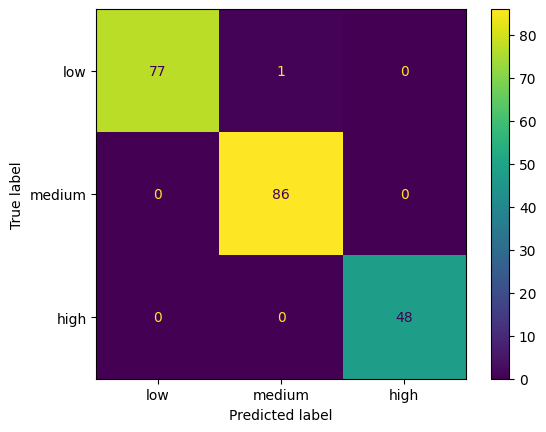

In [26]:
labels = ['low', 'medium', 'high']
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.show()